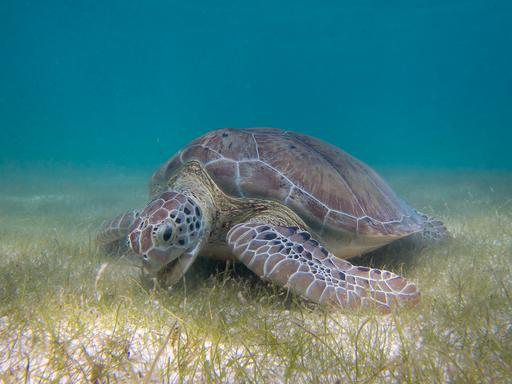

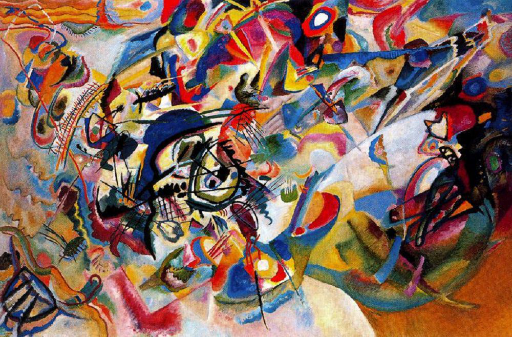

In [1]:
using Images

CONTENT_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/Green_Sea_Turtle_grazing_seagrass.jpg"
STYLE_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg"

content_img = load(CONTENT_URL)
style_img = load(STYLE_URL)

ratio = 512 / max(size(content_img)...)
content_img = imresize(content_img, ratio=ratio)
ratio = 512 / max(size(style_img)...)
style_img = imresize(style_img, ratio=ratio)

display(content_img)
display(style_img)

In [2]:
using Knet
import StyleTransfer.Johnson2016: ImageTransformNet, resnet
import StyleTransfer.Utils: reflect_pad

nn = ImageTransformNet();

┌ Info: Recompiling stale cache file /home/david.lin/.julia/compiled/v1.2/StyleTransfer/PbjJi.ji for StyleTransfer [585f4c16-dfb6-11e9-10bd-b5efeb05374f]
└ @ Base loading.jl:1240


size(x) = (337, 512, 1, 1)
size(x) = 

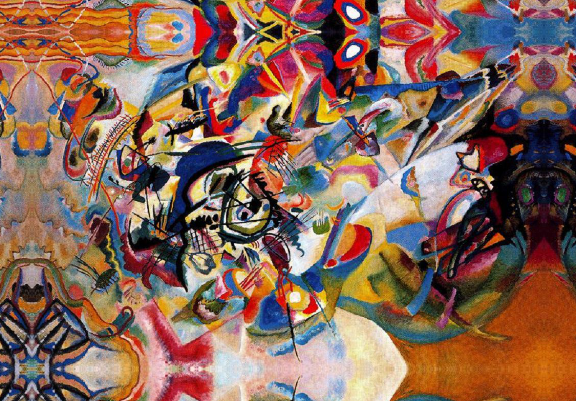

(401, 576, 1, 1)


In [3]:
x = reshape(style_img, size(style_img)..., 1, 1)
@show size(x)
x = reflect_pad(x, 32)
@show size(x)
x = reshape(x, size(x)[1:2]...)
display(x)

In [4]:
x = rand(Float32, 256, 256, 3, 1) |> gpucopy
@time x = nn(x)
@show size(x)
@show typeof(x)

 25.959352 seconds (38.05 M allocations: 1.901 GiB, 6.07% gc time)
size(x) = (256, 256, 3, 1)
typeof(x) = KnetArray{Float32,4}


KnetArray{Float32,4}